<a href="https://colab.research.google.com/github/mequanent/Deep-Learning/blob/main/Maths_for_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone the repository first using the following command
!npx degit https://github.com/mequanent/Deep-Learning -f

npx: installed 1 in 1.934s
> destination directory is not empty. Using --force, continuing
> cloned mequanent/Deep-Learning#HEAD


# Libraries

In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

%matplotlib inline

Load ‘data.mat’ into your Python code, where you will find $x,y∈R^{1001}$. 

# Dataset

In [3]:
data = loadmat(r"Ex1/data.mat")
x = data['x']#.flatten()
y = data['y']#.flatten()

# 1

## a. 
Plot the data using plot function. 

**Plot**

Text(0, 0.5, 'y')

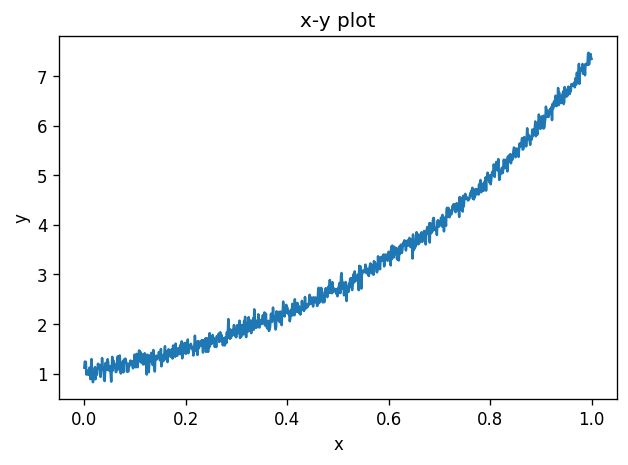

In [ ]:
plt.figure(num=0, dpi=120)
plt.plot(x, y)
plt.title("x-y plot")
plt.xlabel("x")
plt.ylabel("y")


## b. 
Compute the least square line $y=θ_0+xθ_1$ using the given data and overlay the line over the given data.

In [32]:
ones = np.repeat(1, len(x)) # coefficients for θ0 to have one column in x
X1 = np.array([ones, x.flatten()]) # insert the ones at the left of x as coefficient of θ0
θ = np.matmul(np.linalg.pinv(X1.T), (y))
θ = θ.flatten()
θ10, θ11 = θ[0], θ[1]
Y1 = θ10 + θ11 * x

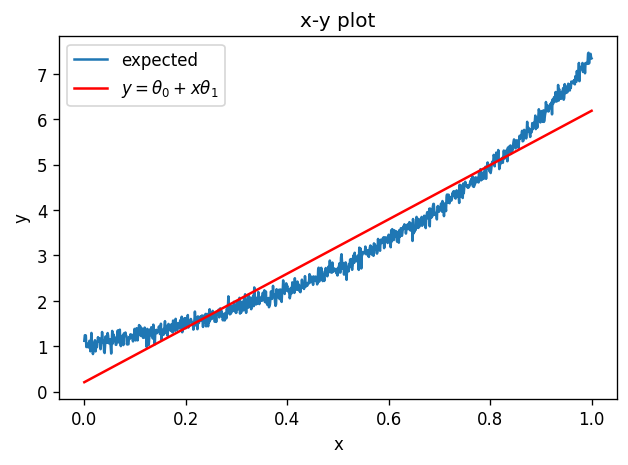

In [33]:
# plot y = θ10 + xθ11

plt.figure(num=0, dpi=120)
plt.plot(x, y, label = r"expected")
plt.plot(x, Y1, "r", label="$y=θ_0+xθ_1$")
plt.title("x-y plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# 2. 
Using the same data from Question 2, compute the least square parabola (i.e. second order polynomial $y=θ_0+xθ_1+x^2 θ_2)$ to fit the data. (5%) Explain which formulation (line or parabola) is more suitable for this dataset and why (please calculate the mean square error for these two fitting equations)?

First, find $θ_0, θ_1, θ_2$.

In [34]:
ones = np.repeat(1, len(x)) # coefficients for θ0 to have one column in x
squares = (x**2).flatten() # x^2 to be multiplied by θ2 as third columns
X2 = np.array([ones, x.flatten(), squares]) # insert the ones at the left 
                                            #and squares on the right of x 
X2 = X2.T
X2.shape

(1001, 3)

In [36]:
θ2 = np.matmul(np.linalg.pinv(X2), (y))
θ2 = θ2.flatten()
θ20, θ21, θ22 = θ2[0], θ2[1], θ2[2]
θ20, θ21, θ22

(1.178945987733097, 0.14356709045621222, 5.837350079181328)

In [37]:
# Predict the expected values of y
Y2 = θ20 + θ21 * x + θ22 * (x ** 2)

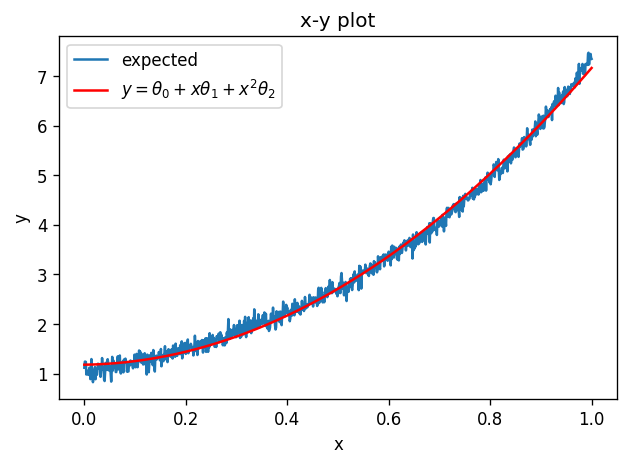

In [38]:
plt.figure(num=0, dpi=120) 
plt.plot(x, y, label = r"expected") 
plt.plot(x, Y2, "r", label="$y=θ_0+xθ_1+x^2θ_2$") 
plt.title("x-y plot") 
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [39]:
# Mean squared error
from sklearn.metrics import mean_squared_error

rmse1 = np.sqrt(mean_squared_error(y,Y1)) # for linear least square
rmse2 = np.sqrt(mean_squared_error(y,Y2)) # for quadratic least square
print(f"rmse for line is: {rmse1} while rmse for parabola is: {rmse2}.")

rmse for line is: 0.453658425277404 while rmse for parabola is: 0.12547876286929024.


 Explain which formulation (line or parabola) is more suitable for this dataset and why. \\
 **Ans:** \\
**The parabola is more suitable for this dataset because the prediction for y  with the parabola is more closer than with the line as the root mean squared error and the visual plots indicate it clearly.** \\
**The prediction error is less when using quadratic linear regression.**

# 3. 
(15%)
Following the previous two questions, please randomly select $100$ data samples for $50$ times and plot these $50$ lines $(y=θ_0+xθ_1)$ and parabolas $(y=θ_0+xθ_1+x^2 θ_2)$ in two separate figures, one for lines and the other for parabolas. (5%) Explain these visualizations based on the bias and variance.

In [130]:
lines = [] # to hold list of 50 linear regression predictions
parabolas = [] # to hold list of 50 quadratic linear regression predictions
samples = []
for i in range(50):
  xs = np.random.choice(x.flatten(), 100) # 100 samples in each iteration
  xs = np.sort(xs) # change samples from list back to array and sort
  Ys1 = θ10 + θ11 * xs # compute the linear regression for the current samples
  Ys2 = θ20 + (θ21 * xs) + (θ22 * (xs ** 2)) # quadratic linear regression for the same sample
  lines.append([xs, Ys1]) 
  parabolas.append([xs, Ys2])
  samples.append(xs)

In [131]:
def plot(func, title):
  plt.figure(num=0, dpi=120)
  for i in range(len(func)):
    plt.plot(func[i][0], func[i][1], label = f"line {i}")

  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(title)
  plt.show

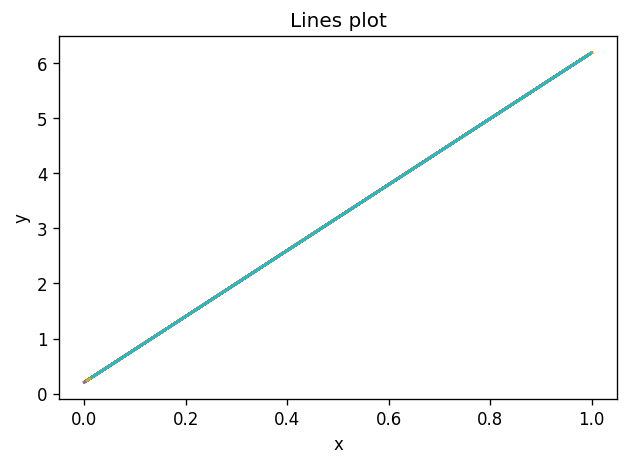

In [132]:
plot(lines, title = "Lines plot")

Parabolas plot

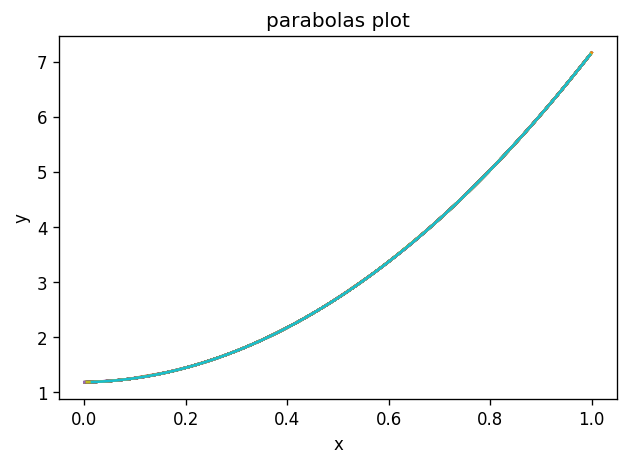

In [133]:
plot(parabolas, "parabolas plot")

Retry with lower samples in each iteration for better resolution

In [134]:
lines = [] # to hold list of 50 linear regression predictions
parabolas = [] # to hold list of 50 quadratic linear regression predictions
samples = []
for i in range(5):
  xs = np.random.choice(x.flatten(), 10) # 100 samples in each iteration
  xs = np.sort(xs) # change samples from list back to array and sort
  Ys1 = θ10 + θ11 * xs # compute the linear regression for the current samples
  Ys2 = θ20 + (θ21 * xs) + (θ22 * (xs ** 2)) # quadratic linear regression for the same sample
  lines.append([xs, Ys1]) 
  parabolas.append([xs, Ys2])
  samples.append(xs)


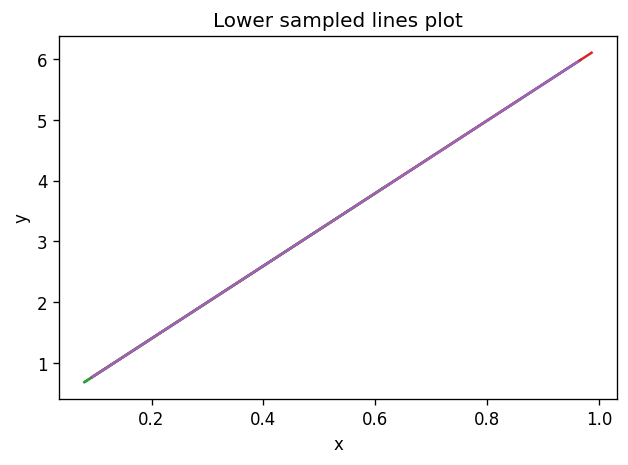

In [135]:
plot(lines, "Lower sampled lines plot")

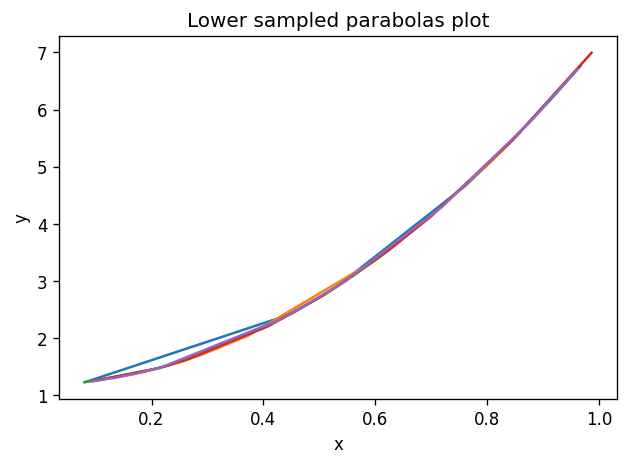

In [136]:
plot(parabolas, "Lower sampled parabolas plot")

# 4. 
(10%) 
In ‘train.mat,’ you can find 2-D points $X=[x1, x2]$ and their corresponding labels $Y=y$. Please use logistic regression $h(θ)=1/(1+e^(-θ^T x))$  to find the decision boundary (optimal $θ^*$) based on ‘train.mat.” Please use a gradient descent method to solve it and report the test error on the test dataset ‘test.mat.’ (percentage of misclassified test samples) 

In [ ]:
train_mat = loadmat(r"Ex1/train.mat")
test_mat = loadmat(r"Ex1/test.mat")

train, test = pd.DataFrame(), pd.DataFrame()

train["x1"], train["x2"] = train_mat['x1'].flatten(),  train_mat['x2']
test["x1"],test["x2"]  = test_mat['x1'].flatten(),  test_mat['x2']

train["y"], test["y"]  = train_mat['y'], test_mat['y']

train.head(3)

,x1,x2,y
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1


In [ ]:
x_train = train.values[:,:2]
x_test = test.values[:,:2]

y_train = train.values[:,2]
y_test = test.values[:,2]

In [ ]:
x_train[:,None]

array([[[5.1, 3.5]],

       [[4.9, 3. ]],

       [[4.7, 3.2]],

       [[4.6, 3.1]],

       [[5. , 3.6]],

       [[5.4, 3.9]],

       [[4.6, 3.4]],

       [[5. , 3.4]],

       [[4.4, 2.9]],

       [[4.9, 3.1]],

       [[5.4, 3.7]],

       [[4.8, 3.4]],

       [[4.8, 3. ]],

       [[4.3, 3. ]],

       [[5.8, 4. ]],

       [[5.7, 4.4]],

       [[5.4, 3.9]],

       [[5.1, 3.5]],

       [[5.7, 3.8]],

       [[5.1, 3.8]],

       [[5.4, 3.4]],

       [[5.1, 3.7]],

       [[4.6, 3.6]],

       [[5.1, 3.3]],

       [[4.8, 3.4]],

       [[5. , 3. ]],

       [[5. , 3.4]],

       [[5.2, 3.5]],

       [[5.2, 3.4]],

       [[4.7, 3.2]],

       [[4.8, 3.1]],

       [[5.4, 3.4]],

       [[5.2, 4.1]],

       [[5.5, 4.2]],

       [[4.9, 3.1]],

       [[7. , 3.2]],

       [[6.4, 3.2]],

       [[6.9, 3.1]],

       [[5.5, 2.3]],

       [[6.5, 2.8]],

       [[5.7, 2.8]],

       [[6.3, 3.3]],

       [[4.9, 2.4]],

       [[6.6, 2.9]],

       [[5.2, 2.7]],

       [[5

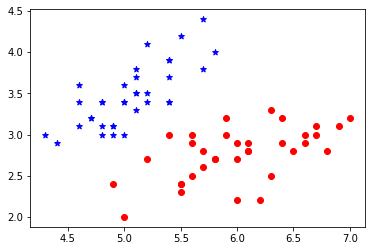

In [ ]:
MARKERS = ['o', '*']
COLORS = ['red', 'blue']

def plot_points(xy, labels):
    
    for i, label in enumerate(set(labels)):
        points = np.array([xy[j,:] for j in range(len(xy)) if labels[j] == label])
        marker = MARKERS[i % len(MARKERS)]
        color = COLORS[i % len(COLORS)]
        plt.scatter(points[:,0], points[:,1], marker=marker, color=color)

plot_points(x_train, y_train)

In [ ]:
x_train = x_train.T
x_test = x_test.T

y_train = y_train.reshape(1,-1)
y_test = y_test.reshape(1,-1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2, 70), (1, 70), (2, 30), (1, 30))

In [ ]:
def sigmoid(a):
  return 1 / (1 + np.exp(-a))

In [ ]:
def logistic_regression(X, Y, learning_rate, iterations):
  m = X.shape[1]
  n = X.shape[0]

  B = 0
  W = np.zeros((n, 1))

  errors = []

  for i in range(iterations):
    Z = np.dot(W.T, X) + B
    Y_pred = sigmoid(Z)

    # loss function
    loss = -(1/m) * np.sum(Y * np.log(Y_pred) + (1-Y) * np.log(1 - Y_pred))

    # Gradient Descent 
    dW = (1/m) * np.dot(Y_pred - Y, X.T)
    dB = (1/m) * np.sum(Y_pred - Y)

    W = W - learning_rate * dW.T
    B = B - learning_rate * dB

    # keeping track of our cost function value
    errors.append(loss)

    if (i % (iterations/100) == 0):
      print(f"cost after {i} iterations is : {loss}")

  return W, B, errors

In [ ]:
iterations = 10000
learning_rate = 0.05
W, B, errors = logistic_regression(x_train, y_train, learning_rate, iterations)

cost after 0 iterations is : 0.6931471805599454
cost after 100 iterations is : 0.4444298254603646
cost after 200 iterations is : 0.3274923017924057
cost after 300 iterations is : 0.2622430018754115
cost after 400 iterations is : 0.22093470387363684
cost after 500 iterations is : 0.19241562680393912
cost after 600 iterations is : 0.171486086953852
cost after 700 iterations is : 0.1554229927407999
cost after 800 iterations is : 0.14266837945859254
cost after 900 iterations is : 0.1322677757810306
cost after 1000 iterations is : 0.12360392444097608
cost after 1100 iterations is : 0.11625980970825711
cost after 1200 iterations is : 0.10994337810005023
cost after 1300 iterations is : 0.10444384464311281
cost after 1400 iterations is : 0.09960514691394699
cost after 1500 iterations is : 0.09530918011987563
cost after 1600 iterations is : 0.09146485140210357
cost after 1700 iterations is : 0.08800072442425608
cost after 1800 iterations is : 0.08485995029121407
cost after 1900 iterations is : 

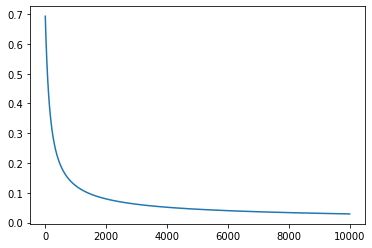

In [ ]:
plt.plot(np.arange(iterations), errors)
plt.show()

In [ ]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

accuracy(x_test, y_test, W, B)

Accuracy of the model is :  96.67 %


# 5.	
Download the MNIST dataset using the following example code:

In [2]:
##############################################
from __future__ import print_function
import keras
from keras.datasets import mnist

# input image dimensions 28x28
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
##############################################

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Please randomly choose 1,000 different handwritten images from either the training or the testing dataset to construct your own dataset, where each digit has 100 data samples.



In [3]:
!pip install numpy_indexed -q

In [4]:
import numpy_indexed as npi # used to get the unique values in numpy array 
#and their corresponding list of indices

In [5]:
# a function to sample n samples from each category
def take_n_samples(x, y, n):
  # get the list of indices for each digit
  _, idx_groups = npi.group_by(y, np.arange(len(y)))

  indices = []

  for i in range(len(idx_groups)):
    indexes = np.random.choice(idx_groups[i], n)
    indices.append(list(indexes))
  
  indices = np.array(indices).flatten()
  np.random.shuffle(indices) # shuffle the indices before getting the data parts
  
  x_sample = x_train[indices]
  x_sample = np.reshape(x_sample, (x_sample.shape[0], -1))
  y_sample = y_train[indices]
  
  return x_sample, y_sample

x_test, y_test = take_n_samples(x_train, y_train, 100)
x_test.shape, y_test.shape

((1000, 784), (1000,))

## 5.1.	
(5%) Use the following code to show 50 images in your own dataset. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


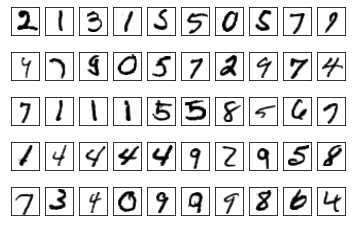

In [ ]:
##############################################
amount= 50
lines = 5
columns = 10
number = np.zeros(amount)

for i in range(amount):
    number[i] = y_test[i]
    # print(number[0])

fig = plt.figure()

for i in range(amount):
    ax = fig.add_subplot(lines, columns, 1 + i)
    plt.imshow(x_test[i,:,:], cmap='binary')
    plt.sca(ax)
    ax.set_xticks([], [])
    ax.set_yticks([], [])

plt.show()
##############################################

## 5.2.	
(15%) Normalize the data (subtracting the mean from it and then dividing it by the standard deviation) and compute the eigenpairs for the covariance of the data (sorted in a descending order based on eigenvalues).

In [14]:
def normalize(X): 
    """ Normalize the given dataset X to have zero mean.
    Args:
        X: ndarray, dataset of shape (N,D)    
    Returns:
        (Xbar, mean): tuple of ndarray, Xbar is the normalized dataset
        with mean 0; mean is the sample mean of the dataset.
    """
    #N, D = X.shape
    #mu = np.zeros((D,)) # the mean of X
    Xmean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    Xnorm = (X-Xmean)#/std           # to compute the normalized data Xbar
    return Xnorm, Xmean, std

In [15]:
x_norm, x_mean, std = normalize(x_test)

In [8]:
x_norm.shape, x_mean.shape, std.shape

((1000, 784), (784,), (784,))

In [16]:
# np.isfinite(x_norm) 
np.isnan(x_test).any(), np.isnan(x_norm).any(), np.isnan(x_mean).any(), np.isnan(std).any()

(False, False, False, False)

In [ ]:
n = np.array([[2, 3, 0, 1, 2],
                    [4, 1, 6, 5, 6]])
mean = np.mean(n, axis=0)
st = np.std(n, axis=0)
mean

array([3., 2., 3., 3., 4.])

In [17]:
cov = np.cov(x_norm.T)
cov = cov.astype(float)
cov.shape 

(784, 784)

In [11]:
std

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.04569104e+00,
       8.54435340e+00, 7.20950144e+00, 6.03346799e+00, 1.13925370e+01,
       6.52278591e+00, 2.59177082e+00, 7.99656120e+00, 1.95963160e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [18]:
eigvals, eigvecs = np.linalg.eig(cov) # get eigen values and eigen vectors
sort_indices = np.argsort(eigvals) # sort in ascending order
sort_indices = np.flip(sort_indices) # reverse in decreasing order
sort_indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  77,  78,
        76,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  93,  92,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 118, 117,
       116, 115, 119, 120, 121, 123, 124, 126, 125, 127, 122, 129, 128,
       130, 131, 132, 134, 133, 135, 136, 137, 138, 140, 139, 141, 142,
       143, 144, 146, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 158, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 174, 173, 172, 175, 176, 177, 178, 179, 18

In [ ]:
eigvals[sort_indices].shape

(784,)

In [ ]:
eigvecs[:, sort_indices].shape

(784, 784)

In [21]:
cov.min()

-5557.573767767762

## 5.3.	 
(15%) Please use PCA to reduce the 784-dimensional data to that with 500, 300, 100, and 50 dimensions, and then show the decoding results, respectively. How do you interpret the results?